# Overview
Now that we have a ledger of transactions we need to see what the insider portfolio was at different times. This is considered a dynamic name discrete space problem. We will unpack the transaction to find out what the insider's portfolio was at all times.

In [14]:
import requests
import pandas as pd
from secret_services import *

pd.options.display.max_columns=99

In [53]:
transactions_df=pd.read_csv("musk_transactions.csv")
transactions_df

,deemedExecutionDate,transaction_index,accessionNumber,acceptanceDateTime,issuerName,issuerCik,issuerTradingSymbol,securityTitle,transactionDate,transactionCoding_transactionFormType,transactionCoding_transactionCode,transactionCoding_equitySwapInvolved,transactionCoding_footnoteId_@id,transactionTimeliness,transactionAmounts_transactionShares,transactionAmounts_transactionShares_footnoteId_@id,transactionAmounts_transactionPricePerShare,transactionAmounts_transactionPricePerShare_footnoteId_@id,transactionAmounts_transactionAcquiredDisposedCode,postTransactionAmounts_sharesOwnedFollowingTransaction,ownershipNature_directOrIndirectOwnership,ownershipNature_natureOfOwnership,ownershipNature_natureOfOwnership_footnoteId_@id,postTransactionAmounts_sharesOwnedFollowingTransaction_footnoteId_@id,deemedExecutionDate.1
0,NaN,0,0000899243-21-047608,2021-12-09T20:21:07.000Z,TESLA MOTORS INC,1318605,TSLA,Common Stock,2021-12-09,4,S,0,F1,NaN,25982.0,F2,1035.029,F3,D,1595807,D,NaN,NaN,NaN,NaN
1,NaN,1,0000899243-21-047608,2021-12-09T20:21:07.000Z,TESLA MOTORS INC,1318605,TSLA,Common Stock,2021-12-09,4,S,0,F1,NaN,30648.0,F2,1036.064,F4,D,1565159,D,NaN,NaN,NaN,NaN
2,NaN,2,0000899243-21-047608,2021-12-09T20:21:07.000Z,TESLA MOTORS INC,1318605,TSLA,Common Stock,2021-12-09,4,S,0,F1,NaN,24015.0,F2,1037.119,F5,D,1541144,D,NaN,NaN,NaN,NaN
3,NaN,3,0000899243-21-047608,2021-12-09T20:21:07.000Z,TESLA MOTORS INC,1318605,TSLA,Common Stock,2021-12-09,4,S,0,F1,NaN,16303.0,F2,1038.159,F6,D,1524841,D,NaN,NaN,NaN,NaN
4,NaN,4,0000899243-21-047608,2021-12-09T20:21:07.000Z,TESLA MOTORS INC,1318605,TSLA,Common Stock,2021-12-09,4,S,0,F1,NaN,27133.0,F2,1039.190,F7,D,1497708,D,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,NaN,0,0001181431-10-035864,2010-07-02T14:35:50.000Z,TESLA MOTORS INC,1318605,TSLA,Common Stock,2010-07-02,4,C,0,NaN,NaN,20655342.0,NaN,NaN,F1,A,23322008,I,By trust,NaN,NaN,2010-07-02
715,NaN,1,0001181431-10-035864,2010-07-02T14:35:50.000Z,TESLA MOTORS INC,1318605,TSLA,Common Stock,2010-07-02,4,C,0,NaN,NaN,3700575.0,NaN,NaN,F2,A,27022583,I,By trust,NaN,NaN,2010-07-02
716,NaN,2,0001181431-10-035864,2010-07-02T14:35:50.000Z,TESLA MOTORS INC,1318605,TSLA,Common Stock,2010-07-02,4,X,0,NaN,NaN,113908.0,NaN,NaN,F3,A,27136491,I,By trust,NaN,NaN,2010-07-02
717,NaN,3,0001181431-10-035864,2010-07-02T14:35:50.000Z,TESLA MOTORS INC,1318605,TSLA,Common Stock,2010-07-02,4,F,0,NaN,NaN,21728.0,NaN,17.000,NaN,D,27114763,I,By trust,NaN,NaN,2010-07-02


Our goal will be to construct Elon Musk's portfolio at time t. Thankfully the SEC gives us two very useful datapoints:  
- postTransactionAmounts_sharesOwnedFollowingTransaction
- transactionAmounts_transactionShares  
  
We'll also need to look at the transactions and the issuerCik codes to know which shares and if they were acquired or sold  
- transactionAmounts_transactionAcquiredDisposedCode
- issuerCik
  
From these columnns we can derive what the portfolio looked like BEFORE making the decision to acquire or dispose of shares. (Note: there are a lot of nuances to this data. One important one is stock incentive programs and grants will not show up until exercised. See the instructions for more information https://www.sec.gov/files/form4data%2C0.pdf)

In [70]:
portfolio_df=transactions_df.copy().sort_values(by=["acceptanceDateTime","transaction_index"])#always sort your data 
portfolio_df

,deemedExecutionDate,transaction_index,accessionNumber,acceptanceDateTime,issuerName,issuerCik,issuerTradingSymbol,securityTitle,transactionDate,transactionCoding_transactionFormType,transactionCoding_transactionCode,transactionCoding_equitySwapInvolved,transactionCoding_footnoteId_@id,transactionTimeliness,transactionAmounts_transactionShares,transactionAmounts_transactionShares_footnoteId_@id,transactionAmounts_transactionPricePerShare,transactionAmounts_transactionPricePerShare_footnoteId_@id,transactionAmounts_transactionAcquiredDisposedCode,postTransactionAmounts_sharesOwnedFollowingTransaction,ownershipNature_directOrIndirectOwnership,ownershipNature_natureOfOwnership,ownershipNature_natureOfOwnership_footnoteId_@id,postTransactionAmounts_sharesOwnedFollowingTransaction_footnoteId_@id,deemedExecutionDate.1
714,NaN,0,0001181431-10-035864,2010-07-02T14:35:50.000Z,TESLA MOTORS INC,1318605,TSLA,Common Stock,2010-07-02,4,C,0,NaN,NaN,20655342.0,NaN,NaN,F1,A,23322008,I,By trust,NaN,NaN,2010-07-02
715,NaN,1,0001181431-10-035864,2010-07-02T14:35:50.000Z,TESLA MOTORS INC,1318605,TSLA,Common Stock,2010-07-02,4,C,0,NaN,NaN,3700575.0,NaN,NaN,F2,A,27022583,I,By trust,NaN,NaN,2010-07-02
716,NaN,2,0001181431-10-035864,2010-07-02T14:35:50.000Z,TESLA MOTORS INC,1318605,TSLA,Common Stock,2010-07-02,4,X,0,NaN,NaN,113908.0,NaN,NaN,F3,A,27136491,I,By trust,NaN,NaN,2010-07-02
717,NaN,3,0001181431-10-035864,2010-07-02T14:35:50.000Z,TESLA MOTORS INC,1318605,TSLA,Common Stock,2010-07-02,4,F,0,NaN,NaN,21728.0,NaN,17.000,NaN,D,27114763,I,By trust,NaN,NaN,2010-07-02
718,NaN,4,0001181431-10-035864,2010-07-02T14:35:50.000Z,TESLA MOTORS INC,1318605,TSLA,Common Stock,2010-07-02,4,S,0,NaN,NaN,1415167.0,NaN,17.000,NaN,D,25699596,I,By trust,NaN,NaN,2010-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,NaN,19,0000899243-21-047608,2021-12-09T20:21:07.000Z,TESLA MOTORS INC,1318605,TSLA,Common Stock,2021-12-09,4,S,0,F1,NaN,1247.0,F2,1057.740,F22,D,1255134,D,NaN,NaN,NaN,NaN
20,NaN,20,0000899243-21-047608,2021-12-09T20:21:07.000Z,TESLA MOTORS INC,1318605,TSLA,Common Stock,2021-12-09,4,S,0,F1,NaN,9657.0,F2,1058.987,F23,D,1245477,D,NaN,NaN,NaN,NaN
21,NaN,21,0000899243-21-047608,2021-12-09T20:21:07.000Z,TESLA MOTORS INC,1318605,TSLA,Common Stock,2021-12-09,4,S,0,F1,NaN,11921.0,F2,1060.360,F24,D,1233556,D,NaN,NaN,NaN,NaN
22,NaN,22,0000899243-21-047608,2021-12-09T20:21:07.000Z,TESLA MOTORS INC,1318605,TSLA,Common Stock,2021-12-09,4,S,0,F1,NaN,1634.0,F2,1061.050,NaN,D,1231922,D,NaN,NaN,NaN,NaN


In [71]:
addition_signs={"A":1,"D":-1}#Use dict so unknown code gives error

portfolio_df['addition_sign']=portfolio_df['transactionAmounts_transactionAcquiredDisposedCode'].apply(lambda x: addition_signs[x])

portfolio_df['preTransactionAmounts_sharesOwnedBeforeTransaction']=transactions_df['transactionAmounts_transactionShares']*(-1*portfolio_df['addition_sign'])+portfolio_df['postTransactionAmounts_sharesOwnedFollowingTransaction']
#notice the negative. Since we are going backwards acquired is a negative


In [72]:
portfolio_df['transactionDate']=pd.to_datetime(portfolio_df['transactionDate'])
portfolio_df=portfolio_df.set_index("transactionDate")

<AxesSubplot:xlabel='transactionDate', ylabel='preTransactionAmounts_sharesOwnedBeforeTransaction'>

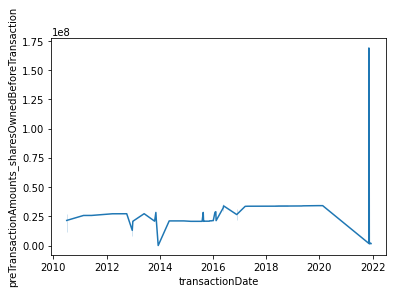

In [73]:
import seaborn as sns

sns.lineplot(x="transactionDate",y="preTransactionAmounts_sharesOwnedBeforeTransaction", data=portfolio_df.reset_index())

In [74]:
portfolio_df['issuerTradingSymbol'].value_counts()

TSLA    719
Name: issuerTradingSymbol, dtype: int64

<AxesSubplot:xlabel='transactionDate', ylabel='postTransactionAmounts_sharesOwnedFollowingTransaction'>

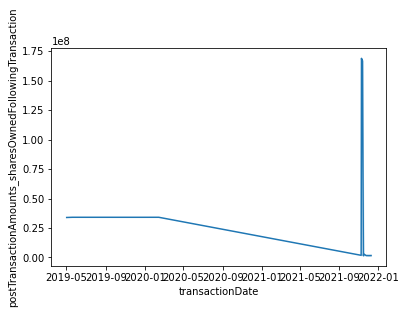

In [76]:

sns.lineplot(x="transactionDate",y="postTransactionAmounts_sharesOwnedFollowingTransaction", 
             
             data=portfolio_df[portfolio_df.index.year>=2019].reset_index())

we need to sum up direct and indirect ownership

In [89]:
decimal.Decimal("171,056,873").replace(",","")

InvalidOperation: [<class 'decimal.ConversionSyntax'>]

In [94]:
import locale
locale.setlocale(locale.LC_NUMERIC, "en_US")
import decimal
f'{decimal.Decimal("171,056,873".replace(",",""))*1000:n}'

'171,056,873,000'

In [92]:
portfolio_df.sort_values(by=["postTransactionAmounts_sharesOwnedFollowingTransaction"], ascending=False).iloc[0]['postTransactionAmounts_sharesOwnedFollowingTransaction']

170485148

In [79]:
portfolio_df[portfolio_df.index.year>=2020]

,deemedExecutionDate,transaction_index,accessionNumber,acceptanceDateTime,issuerName,issuerCik,issuerTradingSymbol,securityTitle,transactionCoding_transactionFormType,transactionCoding_transactionCode,transactionCoding_equitySwapInvolved,transactionCoding_footnoteId_@id,transactionTimeliness,transactionAmounts_transactionShares,transactionAmounts_transactionShares_footnoteId_@id,transactionAmounts_transactionPricePerShare,transactionAmounts_transactionPricePerShare_footnoteId_@id,transactionAmounts_transactionAcquiredDisposedCode,postTransactionAmounts_sharesOwnedFollowingTransaction,ownershipNature_directOrIndirectOwnership,ownershipNature_natureOfOwnership,ownershipNature_natureOfOwnership_footnoteId_@id,postTransactionAmounts_sharesOwnedFollowingTransaction_footnoteId_@id,deemedExecutionDate.1,addition_sign,preTransactionAmounts_sharesOwnedBeforeTransaction
transactionDate,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-14,NaN,0,0001494730-20-000001,2020-02-19T20:02:37.000Z,TESLA MOTORS INC,1318605,TSLA,Common Stock,4,P,0,F1,NaN,13037.0,NaN,767.000,NaN,A,34098597,I,by Trust,F1,NaN,NaN,1,34085560.0
2021-11-08,NaN,0,0000899243-21-044060,2021-11-10T18:23:34.000Z,TESLA MOTORS INC,1318605,TSLA,Common Stock,4,M,0,F1,NaN,2154572.0,NaN,6.240,NaN,A,2154572,D,NaN,NaN,NaN,NaN,1,0.0
2021-11-08,NaN,1,0000899243-21-044060,2021-11-10T18:23:34.000Z,TESLA MOTORS INC,1318605,TSLA,Common Stock,4,S,0,F1,NaN,1100.0,F2,1135.050,NaN,D,2153472,D,NaN,NaN,NaN,NaN,-1,2154572.0
2021-11-08,NaN,2,0000899243-21-044060,2021-11-10T18:23:34.000Z,TESLA MOTORS INC,1318605,TSLA,Common Stock,4,S,0,F1,NaN,600.0,F2,1138.000,NaN,D,2152872,D,NaN,NaN,NaN,NaN,-1,2153472.0
2021-11-08,NaN,3,0000899243-21-044060,2021-11-10T18:23:34.000Z,TESLA MOTORS INC,1318605,TSLA,Common Stock,4,S,0,F1,NaN,2300.0,F2,1139.487,F3,D,2150572,D,NaN,NaN,NaN,NaN,-1,2152872.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-09,NaN,19,0000899243-21-047608,2021-12-09T20:21:07.000Z,TESLA MOTORS INC,1318605,TSLA,Common Stock,4,S,0,F1,NaN,1247.0,F2,1057.740,F22,D,1255134,D,NaN,NaN,NaN,NaN,-1,1256381.0
2021-12-09,NaN,20,0000899243-21-047608,2021-12-09T20:21:07.000Z,TESLA MOTORS INC,1318605,TSLA,Common Stock,4,S,0,F1,NaN,9657.0,F2,1058.987,F23,D,1245477,D,NaN,NaN,NaN,NaN,-1,1255134.0
2021-12-09,NaN,21,0000899243-21-047608,2021-12-09T20:21:07.000Z,TESLA MOTORS INC,1318605,TSLA,Common Stock,4,S,0,F1,NaN,11921.0,F2,1060.360,F24,D,1233556,D,NaN,NaN,NaN,NaN,-1,1245477.0
